<a href="https://colab.research.google.com/github/Shrutakeerti/AWS-Project/blob/main/Pretrained_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1. dingo: 0.3296
2. Labrador_retriever: 0.2401
3. golden_retriever: 0.0859


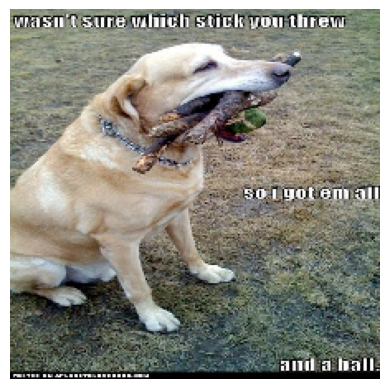

In [4]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained VGG16 model
model = VGG16(weights='imagenet')

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

def predict_dog_breed(img_path):
    img_array = load_and_preprocess_image(img_path)
    predictions = model.predict(img_array)
    decoded_predictions = decode_predictions(predictions, top=3)[0]

    for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
        print(f"{i+1}. {label}: {score:.4f}")

    return decoded_predictions

# Example usage
img_path = '/content/Image_9.jpg'  # Replace with the path to your dog image
predictions = predict_dog_breed(img_path)

# Display the image
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.show()
